# <font color = blue> Lead Scoring Case Study </font>
#### Vishnu M Menon <br> [menon.vishnum@gmail.com](menon.vishnum@gmail.com), +91-9731288115
#### Dharmesh Bhuta <br> [dharmeshbhuta85@gmail.com](dharmeshbhuta85@gmail.com), +91-9819738519

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the required Libraries
import numpy as np
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 1. Import Data
### Data Reading & Data Types

In [3]:
raw_data = pd.read_csv("Leads.csv")
pd.options.display.max_columns = None
raw_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
raw_data.shape

(9240, 37)

## Step 2: Inspecting the Dataframe

In [5]:
raw_data.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [6]:
raw_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
raw_data.isnull().sum()/len(raw_data) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [8]:
raw_data["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [9]:
raw_data["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
NC_EDM                  1
welearnblog_Home        1
testone                 1
blog                    1
Pay per Click Ads       1
youtubechannel          1
WeLearn                 1
Name: Lead Source, dtype: int64

In [10]:
raw_data["Do Not Email"].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [11]:
raw_data["Do Not Call"].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [12]:
raw_data["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [13]:
raw_data["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Nigeria                    4
Kuwait                     4
Canada                     4
Germany                    4
Sweden                     3
Uganda                     2
Ghana                      2
China                      2
Bangladesh                 2
Netherlands                2
Philippines                2
Italy                      2
Asia/Pacific Region        2
Belgium                    2
Russia                     1
Vietnam                    1
Switzerland                1
Kenya                      1
Liberia                    1
Sri Lanka                  1
Tanzania      

In [14]:
raw_data["Specialization"].value_counts() #18

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [15]:
raw_data["How did you hear about X Education"].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

- There are 7 numerical columns
- There are 30 categorical columns: 
    - In that; 16 columns have 3 or more value_counts()
    - 14 columns have ["yes","no"] binary values

### Step 3: Data Preparation
### Data Cleaning and Manipulation
#### Mode for one column

In [16]:
# What matters most to you in choosing a course
raw_data["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [17]:
raw_data["What matters most to you in choosing a course"].isnull().sum()

2709

In [18]:
raw_data["What matters most to you in choosing a course"].fillna(raw_data["What matters most to you in choosing a course"].mode()[0], inplace=True)

In [19]:
raw_data["What matters most to you in choosing a course"].isnull().sum()

0

In [20]:
# Country
raw_data["Country"].isnull().sum()

2461

In [21]:
raw_data["Country"].fillna(raw_data["Country"].mode()[0], inplace=True)

In [22]:
raw_data["Country"].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Nigeria                    4
Kuwait                     4
Canada                     4
Germany                    4
Sweden                     3
Uganda                     2
Ghana                      2
China                      2
Bangladesh                 2
Netherlands                2
Philippines                2
Italy                      2
Asia/Pacific Region        2
Belgium                    2
Russia                     1
Vietnam                    1
Switzerland                1
Kenya                      1
Liberia                    1
Sri Lanka                  1
Tanzania      

In [23]:
raw_data["Country"].isnull().sum()

0

#### handling "Select" values

In [24]:
raw_data = raw_data.replace("Select", np.NaN)

#### Remove null valules

In [25]:
# What is your current occupation
raw_data["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [26]:
raw_data["What is your current occupation"].isnull().sum()/len(raw_data) * 100

29.11255411255411

In [27]:
raw_data = raw_data.dropna(axis=0, subset=["What is your current occupation"])
raw_data["What is your current occupation"].isnull().sum()/len(raw_data) * 100

0.0

In [28]:
raw_data["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
# Imputing "null" values to "Others" for Specialization & City columns
raw_data.Specialization.fillna('Others',inplace=True)
raw_data.City.fillna('Other Cities',inplace=True)

In [30]:
raw_data.shape

(6550, 37)

In [31]:
# Removing columns which has null values more than 40%
raw_data = raw_data.loc[:, round(raw_data.isnull().sum()/len(raw_data) * 100, 2) < 40]

In [32]:
raw_data.shape

(6550, 31)

In [33]:
raw_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       130
Total Time Spent on Website                         0
Page Views Per Visit                              130
Last Activity                                     103
Country                                             0
Specialization                                      0
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [34]:
raw_data = raw_data.dropna(axis=0, subset=["TotalVisits"])

In [35]:
raw_data = raw_data.dropna(axis=0, subset=["Page Views Per Visit"])

In [36]:
raw_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        29
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

#### Univariate & bi-variate Analysis

In [37]:
raw_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000
mean,616232.834268,0.481464,3.604050,532.603427,2.466978
std,23337.951643,0.499695,5.037196,564.945598,2.166570
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,595776.750000,0.000000,1.000000,32.000000,1.000000
50%,613821.500000,0.000000,3.000000,283.500000,2.000000
75%,637108.750000,1.000000,5.000000,1020.000000,3.500000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


#### Total Time Spent on Website

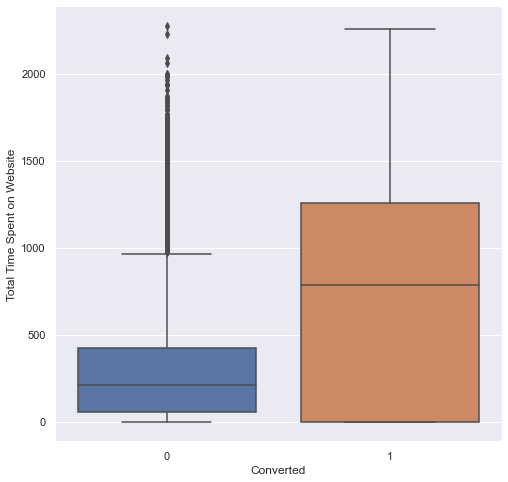

In [38]:
plt.figure(figsize = [8,8])
sns.boxplot(data=raw_data, x="Converted", y="Total Time Spent on Website")
plt.show()

#### Inference
- As we can clearly see from above plot those who have been converted to take up the course have spend considerable amount of time on the website as compared to those who have not.

#### Specialization

In [39]:
## Dividing the data between converted and non-converted just for some EDA purpose before dropping columns with high null values
TARGET0=raw_data[raw_data.Converted==0]
TARGET1=raw_data[raw_data.Converted==1]

In [40]:
raw_data.Specialization.value_counts(normalize=True)

Others                               0.292523
Finance Management                   0.116511
Human Resource Management            0.103738
Marketing Management                 0.103427
Operations Management                0.061059
Business Administration              0.048287
IT Projects Management               0.043302
Supply Chain Management              0.042835
Banking, Investment And Insurance    0.041433
Media and Advertising                0.025078
Travel and Tourism                   0.023209
International Business               0.021184
Healthcare Management                0.019159
Hospitality Management               0.014019
E-COMMERCE                           0.012461
Retail Management                    0.012150
Rural and Agribusiness               0.009034
E-Business                           0.006698
Services Excellence                  0.003894
Name: Specialization, dtype: float64

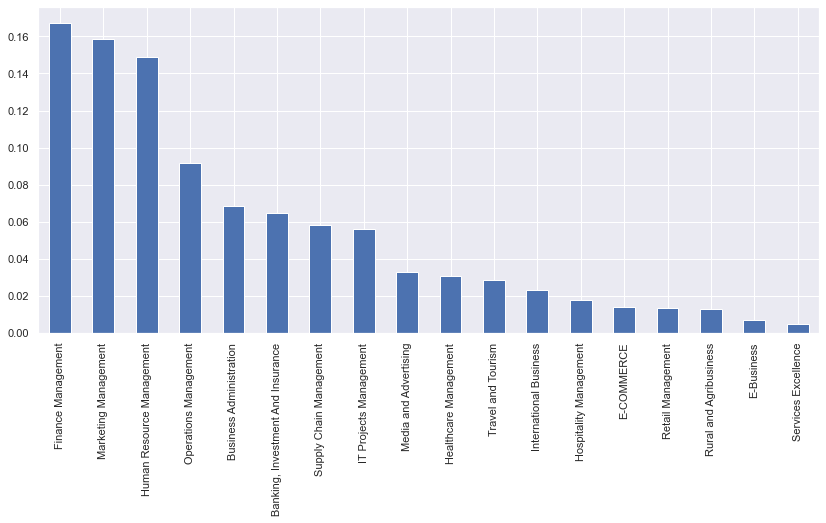

In [41]:
plt.figure(figsize=[14,6])
TARGET1[~(TARGET1.Specialization=='Others')].Specialization.value_counts(normalize=True).plot.bar()
plt.show()

#### Inference 
- As we can see, apart from those whose field of specialization is Unknown, there are 3 primary fields of people who are usually getting converted to the course and hence they should be prioritized for the leads. 

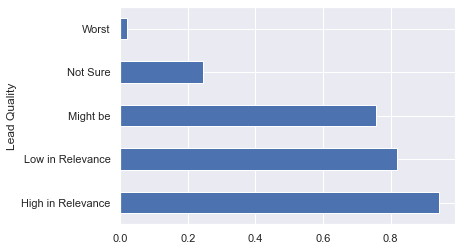

In [42]:
#plot the bar graph of Lead Quality with average of Converted lead.
raw_data.groupby("Lead Quality")["Converted"].mean().plot.barh()
plt.show()

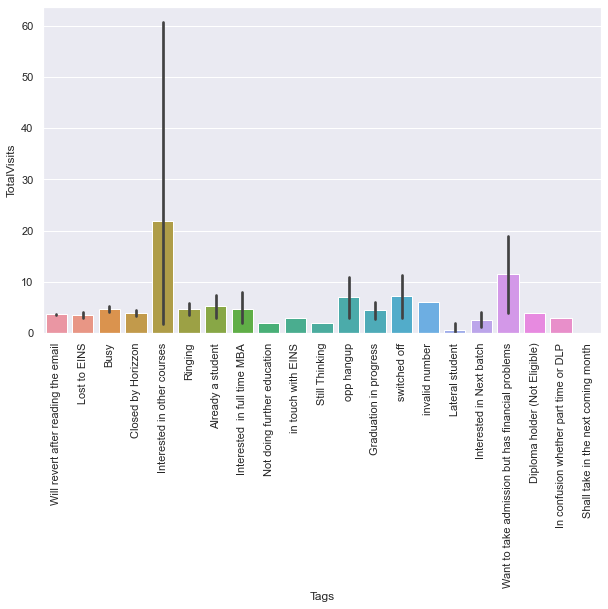

In [43]:
## Tags

plt.figure(figsize = [10,6])
sns.barplot(data=TARGET1, x = "Tags", y = 'TotalVisits')
plt.xticks(rotation=90)
plt.show()

#### Inference
- As we can see from above those with tags category as "Interested in other courses" and probably those with some finanacial need are keen to take up courses and hence making more visits to the website should also be pursued more as they have better chances of being converted.

In [44]:
raw_data.shape

(6420, 31)

#### Current null values

In [45]:
raw_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        29
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [46]:
raw_data.isnull().sum()/len(raw_data) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.451713
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Country                                           0.000000
Specialization                                    0.000000
What is your current occupation                   0.000000
What matters most to you in choosing a course     0.000000
Search                                            0.000000
Magazine                                          0.0000

In [47]:
raw_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Other Cities,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Other Cities,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


In [48]:
raw_data = raw_data.replace({'Yes': 1, 'No': 0})

In [49]:
raw_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Other Cities,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Other Cities,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


#### Remove Sales related columns

In [50]:
raw_data = raw_data.drop(["Prospect ID","Last Activity","Last Notable Activity","Tags","Lead Quality"], axis=1)

In [51]:
raw_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,India,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Other Cities,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,India,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Other Cities,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Mumbai,0,1
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,India,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0


In [52]:
raw_data.shape

(6420, 26)

In [53]:
raw_data.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.0,6420.000000,6420.0,6420.000000,6420.000000,6420.000000,6420.0,6420.0,6420.0,6420.0,6420.000000
mean,616232.834268,0.070717,0.000312,0.481464,3.604050,532.603427,2.466978,0.001558,0.0,0.000156,0.0,0.000156,0.000467,0.000935,0.0,0.0,0.0,0.0,0.338162
std,23337.951643,0.256371,0.017649,0.499695,5.037196,564.945598,2.166570,0.039439,0.0,0.012481,0.0,0.012481,0.021614,0.030559,0.0,0.0,0.0,0.0,0.473121
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,595776.750000,0.000000,0.000000,0.000000,1.000000,32.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,613821.500000,0.000000,0.000000,0.000000,3.000000,283.500000,2.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,637108.750000,0.000000,0.000000,1.000000,5.000000,1020.000000,3.500000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,660737.000000,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


#### Preparation towards setting up dummy variables for the categorical columns

In [54]:
raw_data["Lead Origin"].value_counts()

Landing Page Submission    3644
API                        2140
Lead Add Form               608
Lead Import                  28
Name: Lead Origin, dtype: int64

In [55]:
a3 = raw_data["Lead Origin"].value_counts()
m3 = raw_data["Lead Origin"].isin(a3.index[a3<1000])
raw_data.loc[m3, "Lead Origin"] = np.NaN
raw_data["Lead Origin"].replace(np.NaN, "Others", inplace=True)

In [56]:
raw_data["Lead Origin"].value_counts()

Landing Page Submission    3644
API                        2140
Others                      636
Name: Lead Origin, dtype: int64

In [57]:
raw_data["Lead Source"].value_counts()

Google               2048
Direct Traffic       1891
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
Facebook               28
Click2call              4
bing                    3
Social Media            2
Live Chat               2
Press_Release           1
Pay per Click Ads       1
WeLearn                 1
testone                 1
Name: Lead Source, dtype: int64

In [58]:
# We are setting up a minimum count for each value_counts to replace them as NaN 
a = raw_data["Lead Source"].value_counts()
m = raw_data["Lead Source"].isin(a.index[a<870])
raw_data.loc[m, "Lead Source"] = np.NaN

# Replacing NaN value to Others
raw_data["Lead Source"].replace(np.NaN, "Others", inplace=True) 

In [59]:
raw_data["Lead Source"].value_counts()

Google            2048
Direct Traffic    1891
Olark Chat         892
Organic Search     870
Others             719
Name: Lead Source, dtype: int64

In [60]:
raw_data["Country"].value_counts()

India                   6219
United States             46
United Arab Emirates      39
Singapore                 18
Saudi Arabia              16
United Kingdom            11
Qatar                      9
Australia                  8
Hong Kong                  6
France                     5
Oman                       5
Bahrain                    5
Nigeria                    3
South Africa               3
Kuwait                     3
Uganda                     2
Germany                    2
Netherlands                2
Canada                     2
Philippines                2
Sweden                     2
Russia                     1
Kenya                      1
Italy                      1
Vietnam                    1
China                      1
Ghana                      1
Sri Lanka                  1
Denmark                    1
Tanzania                   1
Malaysia                   1
Indonesia                  1
Bangladesh                 1
Name: Country, dtype: int64

In [61]:
a2 = raw_data["Country"].value_counts()
m2 = raw_data["Country"].isin(a2.index[a2<6000])
raw_data.loc[m2, "Country"] = np.NaN
raw_data["Country"].replace(np.NaN, "Others", inplace=True)

In [62]:
raw_data["Country"].value_counts()

India     6219
Others     201
Name: Country, dtype: int64

In [63]:
raw_data["City"].value_counts()

Other Cities                   2699
Mumbai                         2449
Thane & Outskirts               586
Other Cities of Maharashtra     342
Other Metro Cities              291
Tier II Cities                   53
Name: City, dtype: int64

In [64]:
raw_data["Specialization"].value_counts()

Others                               1878
Finance Management                    748
Human Resource Management             666
Marketing Management                  664
Operations Management                 392
Business Administration               310
IT Projects Management                278
Supply Chain Management               275
Banking, Investment And Insurance     266
Media and Advertising                 161
Travel and Tourism                    149
International Business                136
Healthcare Management                 123
Hospitality Management                 90
E-COMMERCE                             80
Retail Management                      78
Rural and Agribusiness                 58
E-Business                             43
Services Excellence                    25
Name: Specialization, dtype: int64

In [65]:
a4 = raw_data["Specialization"].value_counts()
m4 = raw_data["Specialization"].isin(a4.index[a4<600])
raw_data.loc[m4, "Specialization"] = np.NaN
raw_data["Specialization"].replace(np.NaN, "Others", inplace=True)

In [66]:
raw_data["Specialization"].value_counts()

Others                       4342
Finance Management            748
Human Resource Management     666
Marketing Management          664
Name: Specialization, dtype: int64

### Setting up dummy variables
#### Dummy var1

In [67]:
raw_data.shape

(6420, 26)

In [68]:
raw_data["Lead Origin"].value_counts()

Landing Page Submission    3644
API                        2140
Others                      636
Name: Lead Origin, dtype: int64

In [69]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.
# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(raw_data["Lead Origin"], prefix="Lead Origin")

# Dropping MultipleLines_No phone service column
ml1 = ml.drop(["Lead Origin_Others"], 1)

#Adding the results to the master dataframe
raw_data = pd.concat([raw_data,ml1], axis=1)

In [70]:
raw_data.shape

(6420, 28)

#### Dummy var2

In [71]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.
# Creating dummy variables for the variable 'MultipleLines'
m2 = pd.get_dummies(raw_data["Lead Source"], prefix="Lead Source")

# Dropping MultipleLines_No phone service column
ml2 = m2.drop(["Lead Source_Others"], 1)

#Adding the results to the master dataframe
raw_data = pd.concat([raw_data,ml2], axis=1)

#### Dummy var3

In [72]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.
# Creating dummy variables for the variable 'MultipleLines'
m3 = pd.get_dummies(raw_data["Country"], prefix="Country")

# Dropping MultipleLines_No phone service column
ml3 = m3.drop(["Country_Others"], 1)

#Adding the results to the master dataframe
raw_data = pd.concat([raw_data,ml3], axis=1)

#### Dummy var4

In [73]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.
# Creating dummy variables for the variable 'MultipleLines'
m4 = pd.get_dummies(raw_data["Specialization"], prefix="Specialization")

# Dropping MultipleLines_No phone service column
ml4 = m4.drop(["Specialization_Human Resource Management"], 1)

#Adding the results to the master dataframe
raw_data = pd.concat([raw_data,ml4], axis=1)

#### Dummy var5

In [74]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.
# Creating dummy variables for the variable 'MultipleLines'
m5 = pd.get_dummies(raw_data["What is your current occupation"], prefix="Curr_Occupation")

# Dropping MultipleLines_No phone service column
ml5 = m5.drop(["Curr_Occupation_Other"], 1)

#Adding the results to the master dataframe
raw_data = pd.concat([raw_data,ml5], axis=1)

#### Dummy var6

In [75]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.
# Creating dummy variables for the variable 'MultipleLines'
m6 = pd.get_dummies(raw_data["What matters most to you in choosing a course"], prefix="Course_Choice")

# Dropping MultipleLines_No phone service column
ml6 = m6.drop(["Course_Choice_Other"], 1)

#Adding the results to the master dataframe
raw_data = pd.concat([raw_data,ml6], axis=1)

In [76]:
raw_data.shape

(6420, 43)

In [77]:
raw_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Country_India,Specialization_Finance Management,Specialization_Marketing Management,Specialization_Others,Curr_Occupation_Businessman,Curr_Occupation_Housewife,Curr_Occupation_Student,Curr_Occupation_Unemployed,Curr_Occupation_Working Professional,Course_Choice_Better Career Prospects,Course_Choice_Flexibility & Convenience
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,India,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Other Cities,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,India,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Other Cities,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,India,Others,Student,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Mumbai,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,India,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,India,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0


In [78]:
# We have created dummies for the below variables, so we can drop them
raw_data = raw_data.drop(['Lead Origin','Lead Source','Country','Specialization',"City","What is your current occupation","What matters most to you in choosing a course"], 1)

In [79]:
raw_data.shape

(6420, 36)

In [80]:
raw_data.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Country_India,Specialization_Finance Management,Specialization_Marketing Management,Specialization_Others,Curr_Occupation_Businessman,Curr_Occupation_Housewife,Curr_Occupation_Student,Curr_Occupation_Unemployed,Curr_Occupation_Working Professional,Course_Choice_Better Career Prospects,Course_Choice_Flexibility & Convenience
0,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0


In [81]:
raw_data.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Country_India,Specialization_Finance Management,Specialization_Marketing Management,Specialization_Others,Curr_Occupation_Businessman,Curr_Occupation_Housewife,Curr_Occupation_Student,Curr_Occupation_Unemployed,Curr_Occupation_Working Professional,Course_Choice_Better Career Prospects,Course_Choice_Flexibility & Convenience
count,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.0,6420.000000,6420.0,6420.000000,6420.000000,6420.000000,6420.0,6420.0,6420.0,6420.0,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000
mean,616232.834268,0.070717,0.000312,0.481464,3.604050,532.603427,2.466978,0.001558,0.0,0.000156,0.0,0.000156,0.000467,0.000935,0.0,0.0,0.0,0.0,0.338162,0.333333,0.567601,0.294548,0.319003,0.138941,0.135514,0.968692,0.116511,0.103427,0.676324,0.001246,0.001402,0.032243,0.857009,0.105763,0.999688,0.000156
std,23337.951643,0.256371,0.017649,0.499695,5.037196,564.945598,2.166570,0.039439,0.0,0.012481,0.0,0.012481,0.021614,0.030559,0.0,0.0,0.0,0.0,0.473121,0.471441,0.495448,0.455875,0.466127,0.345912,0.342298,0.174163,0.320862,0.304539,0.467914,0.035281,0.037418,0.176659,0.350091,0.307558,0.017649,0.012481
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,595776.750000,0.000000,0.000000,0.000000,1.000000,32.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,613821.500000,0.000000,0.000000,0.000000,3.000000,283.500000,2.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,637108.750000,0.000000,0.000000,1.000000,5.000000,1020.000000,3.500000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,660737.000000,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
# As Lead Number is a number assigned to each lead procured and is of no significance, we're dropping the same
raw_data = raw_data.drop(["Lead Number"], 1)

In [83]:
raw_data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Country_India,Specialization_Finance Management,Specialization_Marketing Management,Specialization_Others,Curr_Occupation_Businessman,Curr_Occupation_Housewife,Curr_Occupation_Student,Curr_Occupation_Unemployed,Curr_Occupation_Working Professional,Course_Choice_Better Career Prospects,Course_Choice_Flexibility & Convenience
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
3,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0


In [84]:
raw_data.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Country_India,Specialization_Finance Management,Specialization_Marketing Management,Specialization_Others,Curr_Occupation_Businessman,Curr_Occupation_Housewife,Curr_Occupation_Student,Curr_Occupation_Unemployed,Curr_Occupation_Working Professional,Course_Choice_Better Career Prospects,Course_Choice_Flexibility & Convenience
count,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.0,6420.000000,6420.0,6420.000000,6420.000000,6420.000000,6420.0,6420.0,6420.0,6420.0,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000
mean,0.070717,0.000312,0.481464,3.604050,532.603427,2.466978,0.001558,0.0,0.000156,0.0,0.000156,0.000467,0.000935,0.0,0.0,0.0,0.0,0.338162,0.333333,0.567601,0.294548,0.319003,0.138941,0.135514,0.968692,0.116511,0.103427,0.676324,0.001246,0.001402,0.032243,0.857009,0.105763,0.999688,0.000156
std,0.256371,0.017649,0.499695,5.037196,564.945598,2.166570,0.039439,0.0,0.012481,0.0,0.012481,0.021614,0.030559,0.0,0.0,0.0,0.0,0.473121,0.471441,0.495448,0.455875,0.466127,0.345912,0.342298,0.174163,0.320862,0.304539,0.467914,0.035281,0.037418,0.176659,0.350091,0.307558,0.017649,0.012481
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,32.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,283.500000,2.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,1020.000000,3.500000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 4: Test-Train Split

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
# Putting feature variable to X
X = raw_data.drop(["Converted"], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Country_India,Specialization_Finance Management,Specialization_Marketing Management,Specialization_Others,Curr_Occupation_Businessman,Curr_Occupation_Housewife,Curr_Occupation_Student,Curr_Occupation_Unemployed,Curr_Occupation_Working Professional,Course_Choice_Better Career Prospects,Course_Choice_Flexibility & Convenience
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0


In [87]:
# Putting response variable to y
y = raw_data["Converted"]

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [88]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
scaler = StandardScaler()

X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Country_India,Specialization_Finance Management,Specialization_Marketing Management,Specialization_Others,Curr_Occupation_Businessman,Curr_Occupation_Housewife,Curr_Occupation_Student,Curr_Occupation_Unemployed,Curr_Occupation_Working Professional,Course_Choice_Better Career Prospects,Course_Choice_Flexibility & Convenience
6630,0,0,-0.446432,-0.601041,-0.232526,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
8176,0,0,-0.446432,-0.320349,-0.719960,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0
4978,0,0,0.117760,1.056467,0.742343,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
7457,0,0,0.399855,-0.595712,1.229777,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0
4383,0,0,0.681951,0.001205,1.717211,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0


In [91]:
### Checking the converted Rate
converted = (sum(raw_data["Converted"])/len(raw_data["Converted"].index))*100
converted

48.14641744548286

We have almost 48-49% conversion rate

### Step 6: Looking at Correlations

In [92]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [93]:
raw_data.shape

(6420, 35)

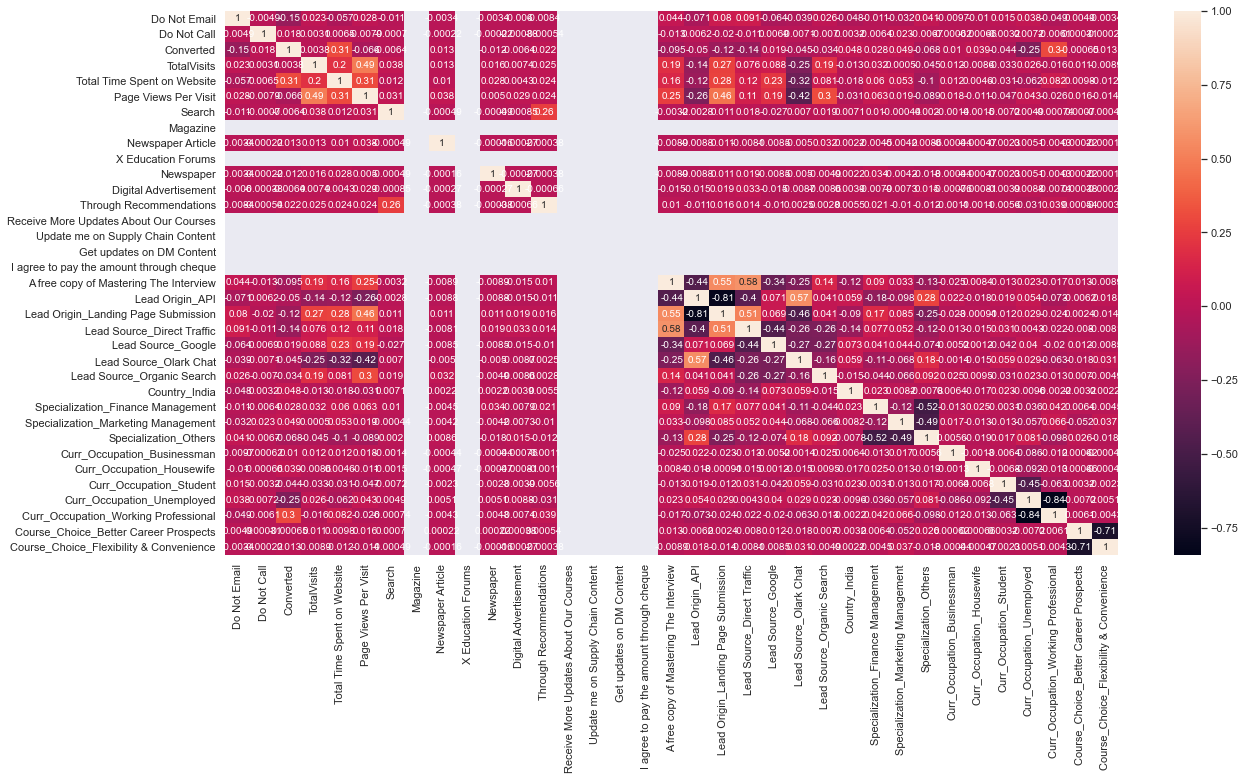

In [94]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(raw_data.corr(),annot = True)
plt.show()

In [95]:
# Removing columns which have no corr() value
X_test = X_test.drop(['Magazine','X Education Forums','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
                       'I agree to pay the amount through cheque'], 1)
X_train = X_train.drop(['Magazine','X Education Forums','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
                       'I agree to pay the amount through cheque'], 1)

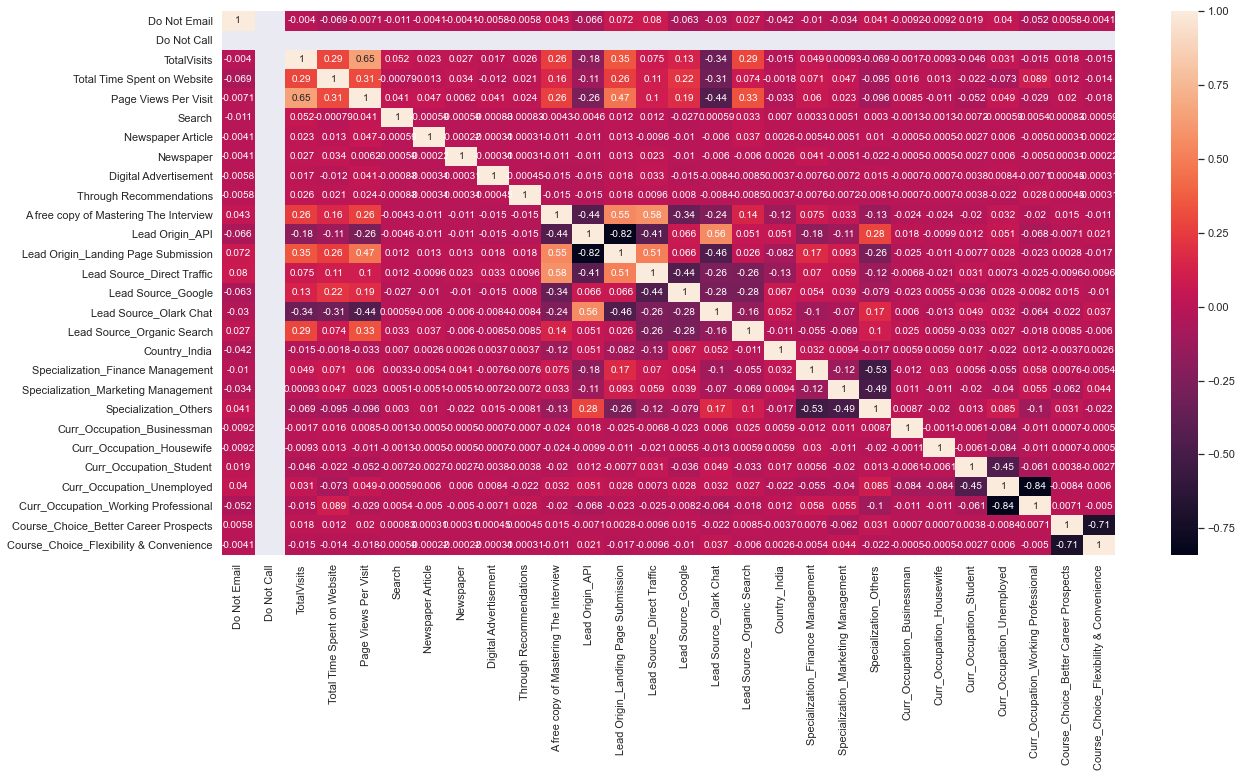

In [96]:
# Let's see the correlation matrix again
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [97]:
# Removing vars having high correlation
# Removing columns which have no corr() value
X_test = X_test.drop(["Lead Origin_API","Curr_Occupation_Unemployed","Course_Choice_Flexibility & Convenience"], 1)
X_train = X_train.drop(["Lead Origin_API","Curr_Occupation_Unemployed","Course_Choice_Flexibility & Convenience"], 1)

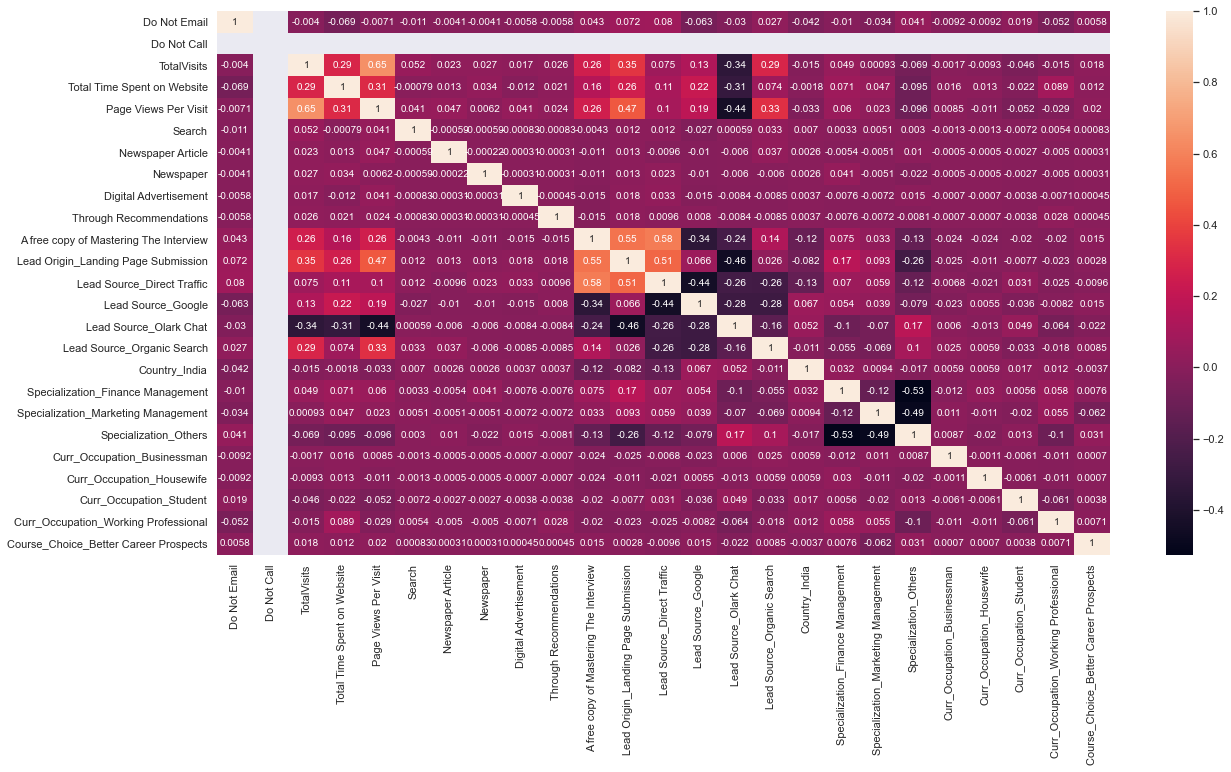

In [98]:
# Let's see the correlation matrix again
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [99]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(4494, 25)
(4494,)
(1926, 25)
(1926,)


### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

In [100]:
import statsmodels.api as sm

In [101]:
# Logistic Regression Model
X_train_sm = sm.add_constant(X_train)
log_res_m1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
log_res_m1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4469
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2301.4
Date:                Wed, 12 Jan 2022   Deviance:                       4602.8
Time:                        17:20:19   Pearson chi2:                 4.75e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      2.5180      1.473      1.709      0.087      -0.369       5.405
Do Not Email                              -1.2352      0.170     -7.258      0.000      -1.569      -0.902
Do Not Call                            -1.094e-10   5.58e-07     -0.000      1.000   -1.09e-06    1.09e-06
TotalVisits                                0.1727      0.049      3.535      0.000       0.077       0.268
Total Time Spent on Website                1.0762      0.045     24.171      0.000       0.989       1.163
Page Views Per Visit                      -0.1820      0.055     -3.282      0.001      -0.291      -0.073
Search                                    -0.0655      0.935     -0.070      0.944      -1.898       1.767
Newspaper Article                         22.6363   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Newspaper                                -24.5947   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Digital Advertisement                    -20.7705    3.4e+04     -0.001      1.000   -6.66e+04    6.66e+04
Through Recommendations                   21.2169   3.25e+04      0.001      0.999   -6.36e+04    6.37e+04
A free copy of Mastering The Interview     0.0340      0.112      0.304      0.761      -0.185       0.253
Lead Origin_Landing Page Submission       -0.1079      0.114     -0.949      0.343      -0.331       0.115
Lead Source_Direct Traffic                -3.2316      0.194    -16.693      0.000      -3.611      -2.852
Lead Source_Google                        -2.8052      0.174    -16.081      0.000      -3.147      -2.463
Lead Source_Olark Chat                    -1.8648      0.160    -11.627      0.000      -2.179      -1.550
Lead Source_Organic Search                -2.9139      0.198    -14.716      0.000      -3.302      -2.526
Country_India                              0.4809      0.236      2.042      0.041       0.019       0.943
Specialization_Finance Management          0.2875      0.159      1.804      0.071      -0.025       0.600
Specialization_Marketing Management        0.1693      0.163      1.037      0.300      -0.151       0.490
Specialization_Others                     -0.0342      0.127     -0.269      0.788      -0.284       0.216
Curr_Occupation_Businessman               -0.1722      1.024     -0.168      0.866      -2.178       1.834
Curr_Occupation_Housewife                 21.5752   2.03e+04      0.001      0.999   -3.97e+04    3.98e+04
Curr_Occupation_Student                   -0.1731      0.200     -0.866      0.387      -0.565       0.219
Curr_Occupation_Working Professional       2.4680      0.182     13.546      0.000       2.111       2.825
Course_Choice_Better Career Prospects     -0.6094      1.441     -0.423      0.672     

### Step 8: Feature Selection Using RFE

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
log_reg_m1 = LogisticRegression()

In [104]:
from sklearn.feature_selection import RFE
rfe = RFE(log_reg_m1, 20)        # running RFE with 20 variables as output out of 25
rfe = rfe.fit(X_train, y_train)

In [105]:
rfe.support_

array([ True, False,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True])

In [106]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 6),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 4),
 ('Newspaper Article', True, 1),
 ('Newspaper', True, 1),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', True, 1),
 ('A free copy of Mastering The Interview', False, 5),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Country_India', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Others', False, 3),
 ('Curr_Occupation_Businessman', False, 2),
 ('Curr_Occupation_Housewife', True, 1),
 ('Curr_Occupation_Student', True, 1),
 ('Curr_Occupation_Working Professional', True, 1),
 ('Course_Choice_Better Career Prospects', True, 1)]

In [107]:
col = X_train.columns[rfe.support_]

In [108]:
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Newspaper Article', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Country_India',
       'Specialization_Finance Management',
       'Specialization_Marketing Management', 'Curr_Occupation_Housewife',
       'Curr_Occupation_Student', 'Curr_Occupation_Working Professional',
       'Course_Choice_Better Career Prospects'],
      dtype='object')

In [109]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Search', 'A free copy of Mastering The Interview',
       'Specialization_Others', 'Curr_Occupation_Businessman'],
      dtype='object')

#### Assessing the model with StatsModels

In [110]:
# Logistic Regression Model
X_train_sm2 = sm.add_constant(X_train[col])
log_res_m2 = sm.GLM(y_train, X_train_sm2, family=sm.families.Binomial())
res = log_res_m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4473
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2301.5
Date:                Wed, 12 Jan 2022   Deviance:                       4603.0
Time:                        17:20:20   Pearson chi2:                 4.75e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.4828      1.467      1.692      0.091      -0.393       5.359
Do Not Email                             -1.2376      0.170     -7.278      0.000      -1.571      -0.904
TotalVisits                               0.1747      0.049      3.602      0.000       0.080       0.270
Total Time Spent on Website               1.0770      0.044     24.228      0.000       0.990       1.164
Page Views Per Visit                     -0.1828      0.055     -3.296      0.001      -0.291      -0.074
Newspaper Article                        22.6095   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Newspaper                               -24.6263   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Digital Advertisement                   -20.8031    3.4e+04     -0.001      1.000   -6.66e+04    6.66e+04
Through Recommendations                  21.2192   3.24e+04      0.001      0.999   -6.34e+04    6.35e+04
Lead Origin_Landing Page Submission      -0.0916      0.106     -0.860      0.390      -0.300       0.117
Lead Source_Direct Traffic               -3.2210      0.188    -17.118      0.000      -3.590      -2.852
Lead Source_Google                       -2.8123      0.173    -16.236      0.000      -3.152      -2.473
Lead Source_Olark Chat                   -1.8660      0.160    -11.655      0.000      -2.180      -1.552
Lead Source_Organic Search               -2.9108      0.196    -14.849      0.000      -3.295      -2.527
Country_India                             0.4769      0.235      2.029      0.042       0.016       0.937
Specialization_Finance Management         0.3155      0.120      2.628      0.009       0.080       0.551
Specialization_Marketing Management       0.1972      0.124      1.593      0.111      -0.045       0.440
Curr_Occupation_Housewife                21.5702   2.03e+04      0.001      0.999   -3.98e+04    3.98e+04
Curr_Occupation_Student                  -0.1744      0.200     -0.873      0.383      -0.566       0.217
Curr_Occupation_Working Professional      2.4681      0.182     13.563      0.000       2.111       2.825
Course_Choice_Better Career Prospects    -0.5987      1.439     -0.416      0.677      -3.418       2.221
=========================================================================================================
"""

In [111]:
# Removing variables with high p-value
col = col.drop(["Newspaper Article","Newspaper","Digital Advertisement","Curr_Occupation_Housewife",
                "Through Recommendations"], 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Country_India',
       'Specialization_Finance Management',
       'Specialization_Marketing Management', 'Curr_Occupation_Student',
       'Curr_Occupation_Working Professional',
       'Course_Choice_Better Career Prospects'],
      dtype='object')

In [112]:
# Logistic Regression Model
X_train_sm3 = sm.add_constant(X_train[col])
log_res_m3 = sm.GLM(y_train, X_train_sm3, family=sm.families.Binomial())
res = log_res_m3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4478
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2306.8
Date:                Wed, 12 Jan 2022   Deviance:                       4613.6
Time:                        17:20:20   Pearson chi2:                 4.76e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.4939      1.468      1.699      0.089      -0.383       5.370
Do Not Email                             -1.2388      0.170     -7.285      0.000      -1.572      -0.905
TotalVisits                               0.1709      0.048      3.527      0.000       0.076       0.266
Total Time Spent on Website               1.0764      0.044     24.258      0.000       0.989       1.163
Page Views Per Visit                     -0.1790      0.055     -3.243      0.001      -0.287      -0.071
Lead Origin_Landing Page Submission      -0.0863      0.106     -0.812      0.417      -0.295       0.122
Lead Source_Direct Traffic               -3.2364      0.188    -17.211      0.000      -3.605      -2.868
Lead Source_Google                       -2.8172      0.173    -16.278      0.000      -3.156      -2.478
Lead Source_Olark Chat                   -1.8724      0.160    -11.701      0.000      -2.186      -1.559
Lead Source_Organic Search               -2.9135      0.196    -14.882      0.000      -3.297      -2.530
Country_India                             0.4767      0.235      2.028      0.043       0.016       0.937
Specialization_Finance Management         0.3057      0.120      2.552      0.011       0.071       0.540
Specialization_Marketing Management       0.1945      0.124      1.571      0.116      -0.048       0.437
Curr_Occupation_Student                  -0.1746      0.200     -0.874      0.382      -0.566       0.217
Curr_Occupation_Working Professional      2.4697      0.182     13.577      0.000       2.113       2.826
Course_Choice_Better Career Prospects    -0.6026      1.439     -0.419      0.675      -3.422       2.217
=========================================================================================================
"""

In [113]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm3)
y_train_pred[:10]

6630    0.162972
8176    0.302033
4978    0.619870
7457    0.207763
4383    0.326288
4152    0.384336
406     0.769680
8992    0.256225
1504    0.203254
66      0.572031
dtype: float64

In [114]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.16297221, 0.30203278, 0.6198701 , 0.20776293, 0.32628775,
       0.38433612, 0.76967994, 0.25622491, 0.20325385, 0.57203098])

#### Creating a dataframe with the actual Convertion flag and the predicted probabilities

In [115]:
y_train_pred_final = pd.DataFrame({"Converted":y_train.values, "Converted_Prob":y_train_pred})
y_train_pred_final["Lead Number"] = y_train.index
y_train_pred_final.head(10)

,Converted,Converted_Prob,Lead Number
0,0,0.162972,6630
1,0,0.302033,8176
2,0,0.619870,4978
3,0,0.207763,7457
4,0,0.326288,4383
5,0,0.384336,4152
6,1,0.769680,406
7,0,0.256225,8992
8,0,0.203254,1504
9,1,0.572031,66


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [116]:
y_train_pred_final["predicted"] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.162972,6630,0
1,0,0.302033,8176,0
2,0,0.619870,4978,1
3,0,0.207763,7457,0
4,0,0.326288,4383,0
5,0,0.384336,4152,0
6,1,0.769680,406,1
7,0,0.256225,8992,0
8,0,0.203254,1504,0
9,1,0.572031,66,1


In [117]:
from sklearn import metrics

In [118]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1931  410]
 [ 659 1494]]


In [119]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7621272808188696


#### Checking VIFs

In [120]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [121]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif["Features"] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Course_Choice_Better Career Prospects,45.35
9,Country_India,33.06
5,Lead Source_Direct Traffic,6.22
6,Lead Source_Google,5.71
4,Lead Origin_Landing Page Submission,4.94
8,Lead Source_Organic Search,3.34
7,Lead Source_Olark Chat,2.35
3,Page Views Per Visit,2.26
1,TotalVisits,1.81
2,Total Time Spent on Website,1.27


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable "Country_India' has the highest VIF. So let's start by dropping that.

In [122]:
col = col.drop(["Country_India"], 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Specialization_Finance Management',
       'Specialization_Marketing Management', 'Curr_Occupation_Student',
       'Curr_Occupation_Working Professional',
       'Course_Choice_Better Career Prospects'],
      dtype='object')

In [123]:
# Logistic Regression Model
X_train_sm4 = sm.add_constant(X_train[col])
log_res_m4 = sm.GLM(y_train, X_train_sm4, family=sm.families.Binomial())
res = log_res_m4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4479
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2308.9
Date:                Wed, 12 Jan 2022   Deviance:                       4617.9
Time:                        17:20:20   Pearson chi2:                 4.78e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.9796      1.450      2.055      0.040       0.138       5.821
Do Not Email                             -1.2449      0.170     -7.328      0.000      -1.578      -0.912
TotalVisits                               0.1719      0.048      3.550      0.000       0.077       0.267
Total Time Spent on Website               1.0769      0.044     24.285      0.000       0.990       1.164
Page Views Per Visit                     -0.1793      0.055     -3.246      0.001      -0.288      -0.071
Lead Origin_Landing Page Submission      -0.0882      0.106     -0.829      0.407      -0.297       0.120
Lead Source_Direct Traffic               -3.2615      0.188    -17.364      0.000      -3.630      -2.893
Lead Source_Google                       -2.8219      0.173    -16.295      0.000      -3.161      -2.482
Lead Source_Olark Chat                   -1.8734      0.160    -11.703      0.000      -2.187      -1.560
Lead Source_Organic Search               -2.9261      0.196    -14.946      0.000      -3.310      -2.542
Specialization_Finance Management         0.3156      0.120      2.637      0.008       0.081       0.550
Specialization_Marketing Management       0.2003      0.124      1.620      0.105      -0.042       0.443
Curr_Occupation_Student                  -0.1652      0.200     -0.826      0.409      -0.557       0.227
Curr_Occupation_Working Professional      2.4680      0.182     13.572      0.000       2.112       2.824
Course_Choice_Better Career Prospects    -0.6143      1.440     -0.427      0.670      -3.437       2.208
=========================================================================================================
"""

In [124]:
y_train_pred = res.predict(X_train_sm4).values.reshape(-1)

In [125]:
y_train_pred[:10]

array([0.15887703, 0.29872667, 0.61775846, 0.20520006, 0.324275  ,
       0.38320052, 0.76951175, 0.25475239, 0.19934053, 0.57027274])

In [126]:
y_train_pred_final["Converted_Prob"] = y_train_pred

In [127]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.158877,6630,0
1,0,0.298727,8176,0
2,0,0.617758,4978,1
3,0,0.205200,7457,0
4,0,0.324275,4383,0


In [128]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7641299510458389


So overall the accuracy hasn't dropped much.

#### Let's check the VIFs again

In [129]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Course_Choice_Better Career Prospects,12.23
5,Lead Source_Direct Traffic,6.19
6,Lead Source_Google,5.71
4,Lead Origin_Landing Page Submission,4.94
8,Lead Source_Organic Search,3.34
7,Lead Source_Olark Chat,2.35
3,Page Views Per Visit,2.26
1,TotalVisits,1.81
2,Total Time Spent on Website,1.27
9,Specialization_Finance Management,1.21


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable "Course_Choice_Better Career Prospects' has the highest VIF. So let's start by dropping that.

In [130]:
col = col.drop(["Course_Choice_Better Career Prospects"], 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Specialization_Finance Management',
       'Specialization_Marketing Management', 'Curr_Occupation_Student',
       'Curr_Occupation_Working Professional'],
      dtype='object')

In [131]:
# Logistic Regression Model
X_train_sm5 = sm.add_constant(X_train[col])
log_res_m5 = sm.GLM(y_train, X_train_sm5, family=sm.families.Binomial())
res = log_res_m5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4480
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2309.0
Date:                Wed, 12 Jan 2022   Deviance:                       4618.0
Time:                        17:20:20   Pearson chi2:                 4.78e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    2.3646      0.149     15.839      0.000       2.072       2.657
Do Not Email                            -1.2452      0.170     -7.330      0.000      -1.578      -0.912
TotalVisits                              0.1718      0.048      3.548      0.000       0.077       0.267
Total Time Spent on Website              1.0767      0.044     24.283      0.000       0.990       1.164
Page Views Per Visit                    -0.1796      0.055     -3.251      0.001      -0.288      -0.071
Lead Origin_Landing Page Submission     -0.0882      0.106     -0.830      0.407      -0.297       0.120
Lead Source_Direct Traffic              -3.2605      0.188    -17.361      0.000      -3.629      -2.892
Lead Source_Google                      -2.8215      0.173    -16.294      0.000      -3.161      -2.482
Lead Source_Olark Chat                  -1.8722      0.160    -11.698      0.000      -2.186      -1.559
Lead Source_Organic Search              -2.9252      0.196    -14.943      0.000      -3.309      -2.542
Specialization_Finance Management        0.3158      0.120      2.638      0.008       0.081       0.550
Specialization_Marketing Management      0.2043      0.123      1.657      0.098      -0.037       0.446
Curr_Occupation_Student                 -0.1656      0.200     -0.828      0.408      -0.558       0.226
Curr_Occupation_Working Professional     2.4675      0.182     13.570      0.000       2.111       2.824
========================================================================================================
"""

In [132]:
# Getting prediction values on the train set
y_train_pred = res.predict(X_train_sm5).values.reshape(-1)

In [133]:
y_train_pred[:10]

array([0.15893322, 0.29882318, 0.61759645, 0.20518048, 0.32408309,
       0.38344585, 0.77010612, 0.2547372 , 0.20000683, 0.57021341])

In [134]:
y_train_pred_final["Converted_Prob"] = y_train_pred

In [135]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.158933,6630,0
1,0,0.298823,8176,0
2,0,0.617596,4978,1
3,0,0.205180,7457,0
4,0,0.324083,4383,0


In [136]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7639074321317312


#### Let's check the VIFs again

In [137]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Landing Page Submission,4.90
5,Lead Source_Direct Traffic,3.26
3,Page Views Per Visit,2.14
6,Lead Source_Google,2.08
1,TotalVisits,1.79
8,Lead Source_Organic Search,1.50
7,Lead Source_Olark Chat,1.31
2,Total Time Spent on Website,1.22
9,Specialization_Finance Management,1.19
10,Specialization_Marketing Management,1.15


### Metrics beyond simply accuracy

In [138]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [139]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6939154667905248

In [140]:
# Let us calculate specificity
TN / float(TN+FP)

0.8248611704399829

In [141]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.17513882956001708


In [142]:
# positive predictive value 
print (TP / float(TP+FP))

0.7846638655462185


In [143]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7455598455598456


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [144]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [145]:
fpr, tpr, thresholds = metrics.roc_curve(  y_train_pred_final.Converted,  y_train_pred_final.Converted_Prob, drop_intermediate = False )

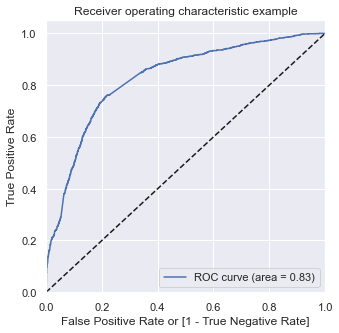

In [146]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [147]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.158933,6630,0,1,1,0,0,0,0,0,0,0,0
1,0,0.298823,8176,0,1,1,1,0,0,0,0,0,0,0
2,0,0.617596,4978,1,1,1,1,1,1,1,1,0,0,0
3,0,0.205180,7457,0,1,1,1,0,0,0,0,0,0,0
4,0,0.324083,4383,0,1,1,1,1,0,0,0,0,0,0


In [148]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.479083  1.000000  0.000000
0.1   0.1  0.514686  0.997678  0.070483
0.2   0.2  0.625723  0.947051  0.330201
0.3   0.3  0.726079  0.883883  0.580948
0.4   0.4  0.771918  0.758012  0.784707
0.5   0.5  0.763907  0.696238  0.826143
0.6   0.6  0.744326  0.614956  0.863306
0.7   0.7  0.708723  0.502555  0.898334
0.8   0.8  0.669782  0.381793  0.934643
0.9   0.9  0.595683  0.170460  0.986758


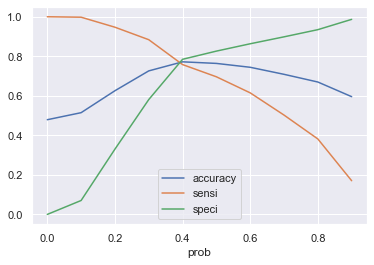

In [149]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [150]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.158933,6630,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.298823,8176,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.617596,4978,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.205180,7457,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.324083,4383,0,1,1,1,1,0,0,0,0,0,0,0


In [151]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7719181130396083

In [152]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1837,  504],
       [ 521, 1632]], dtype=int64)

In [153]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [154]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7580120761727822

In [155]:
# Let us calculate specificity
TN / float(TN+FP)

0.7847073900042717

In [156]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.21529260999572833


In [157]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7640449438202247


In [158]:
# Negative predictive value
print (TN / float(TN+ FN))

0.779050042408821


### Precision and Recall

In [159]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1934,  407],
       [ 654, 1499]], dtype=int64)

##### Precision
TP / TP + FP

In [160]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7864637985309548

##### Recall
TP / TP + FN

In [161]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6962378077101719

Using sklearn utilities for the same

In [162]:
from sklearn.metrics import precision_score, recall_score

In [163]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7864637985309548

In [164]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6962378077101719

### Precision and recall tradeoff

In [165]:
from sklearn.metrics import precision_recall_curve

In [166]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 4489    0
 4490    0
 4491    1
 4492    0
 4493    0
 Name: Converted, Length: 4494, dtype: int64,
 0       0
 1       0
 2       1
 3       0
 4       0
        ..
 4489    0
 4490    1
 4491    0
 4492    0
 4493    0
 Name: predicted, Length: 4494, dtype: int64)

In [167]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

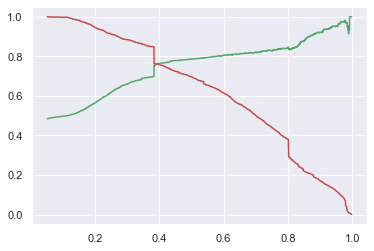

In [168]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [169]:
X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

In [170]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Specialization_Finance Management,Specialization_Marketing Management,Curr_Occupation_Student,Curr_Occupation_Working Professional
4051,0,0.117760,1.768858,-0.232526,1,0,1,0,0,1,0,0,0
1696,1,-0.164336,0.487975,0.254908,1,1,0,0,0,0,0,0,0
1325,0,1.528239,1.207473,3.179514,1,0,0,0,1,0,0,0,0
7991,0,-0.164336,2.120612,-0.476243,1,0,1,0,0,0,0,0,0
8177,0,-0.164336,0.889473,0.254908,1,0,1,0,0,0,1,0,0


In [171]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [172]:
y_test_pred = res.predict(X_test_sm)

In [173]:
y_test_pred[:10]

4051    0.850350
1696    0.144568
1325    0.584861
7991    0.857610
8177    0.632486
404     0.747531
6682    0.139016
5575    0.801746
5930    0.384700
8723    0.236855
dtype: float64

In [174]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [175]:
# Let's see the head
y_pred_1.head()

,0
4051,0.850350
1696,0.144568
1325,0.584861
7991,0.857610
8177,0.632486


In [176]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [177]:
# Putting CustID to index
y_test_df["Lead Number"] = y_test_df.index

In [178]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [179]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [180]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,4051,0.850350
1,1,1696,0.144568
2,0,1325,0.584861
3,0,7991,0.857610
4,1,8177,0.632486


In [181]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : "Converted_Prob"})

In [182]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_Prob'], axis=1)

In [183]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,4051,0,0.850350
1,1696,1,0.144568
2,1325,0,0.584861
3,7991,0,0.857610
4,8177,1,0.632486


In [184]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [185]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,4051,0,0.850350,1
1,1696,1,0.144568,0
2,1325,0,0.584861,1
3,7991,0,0.857610,1
4,8177,1,0.632486,1


In [186]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7611630321910696

In [187]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[739, 249],
       [211, 727]], dtype=int64)

In [188]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [189]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7750533049040512

In [190]:
# Let us calculate specificity
TN / float(TN+FP)

0.7479757085020243